# UMAP

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that can be used for visualizing high-dimensional data in lower dimensions. UMAP is a non-linear method that preserves the local and global structure of the data.

UMAP works by creating a low-dimensional representation of the data that captures the topological structure of the high-dimensional data. The method is based on the concept of a manifold, which is a mathematical object that describes a space that locally resembles a Euclidean space, but can have a more complex global structure. In UMAP, the goal is to find a low-dimensional representation of the data that preserves the local and global structure of the manifold.

UMAP works by constructing a graph that represents the high-dimensional data, where each data point is a node in the graph, and edges connect neighboring points. The graph is then transformed into a fuzzy topological representation of the manifold, where the edge weights represent the probability that two data points are connected by a path in the manifold.

Next, a low-dimensional representation of the data is created using stochastic gradient descent, where the goal is to minimize the cross-entropy between the fuzzy topological representation of the high-dimensional data and the low-dimensional representation. The low-dimensional representation is created in a way that is consistent with the topological structure of the high-dimensional data.

To interpret UMAP, it is helpful to consider the low-dimensional representation of the data that is created. This representation can be visualized using a scatter plot or other visualization technique. In the low-dimensional representation, data points that are close together represent similar data points in the high-dimensional space. Additionally, the local and global structure of the data is preserved in the low-dimensional representation, which means that data points that are connected by paths in the high-dimensional space are likely to be close together in the low-dimensional representation.

It is important to note that UMAP is a non-linear method, which means that the relationship between the high-dimensional data and the low-dimensional representation may be complex and difficult to interpret. However, UMAP can be a powerful tool for exploring and visualizing high-dimensional data, and can provide insights into the underlying structure of the data.

Typical values for min_dist in UMAP can range from 0.0 to 1.0, where lower values tend to emphasize more of the local structure, whereas higher values focus on the global structure.

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

try:
    WORKING_DIR
except NameError:
    WORKING_DIR = Path.cwd().parent.parent

%cd $WORKING_DIR

/home/jmachadofreitas/Projects/cannabis-seed-microbiome


In [10]:
import umap
import umap.plot
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pathlib import Path
%matplotlib inline
umap.plot.output_notebook()

sns.set(style='white', context='notebook', rc={'figure.figsize':(2*16,9)})

Path("outputs/umap/figures").mkdir(parents=True, exist_ok=True)

def draw_umap(
    root,
    filename,
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='braycurtis',
    center=False,
    title='',
    c=None,
    prefix = "sample",
    output_path = "outputs/umap/",
    plot=False
):
    root = Path(root)
    filename = Path(filename)
    filename.stem
    output_path = Path(output_path)
    output_path.mkdir(exist_ok=True, parents=True)
    table = pd.read_csv(root / "cultivar-css.csv").set_index("id")
    
    if center:
        data = StandardScaler(with_std=False).fit_transform(table)
    else:
        data = table.values
    
    projector = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    
    u = projector.fit_transform(data)
    df = pd.DataFrame(u)
    df.index = table.index
    df.to_csv(output_path / f"{prefix}-{filename.stem}_n={n_neighbors}_d={min_dist}.csv", index=False)
    if plot:
        fig = plt.figure()
        if n_components == 1:
            ax = fig.add_subplot(111)
            ax.scatter(u[:,0], range(len(u)), c=c)
        if n_components == 2:
            ax = fig.add_subplot(111)
            ax.scatter(u[:,0], u[:,1], c=c)
        if n_components == 3:
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(u[:,0], u[:,1], u[:,2], c=c, s=100)
        plt.title(title, fontsize=18)
        plt.show()

min_dists = (0.0, 0.01, 0.1, 0.5, 1)
n_neighbors_list = (5, 10, 20, 50, 100)
metric='braycurtis'  # "euclidean", "minkowski"

filenames = list()
stem = "cultivar"
for prefix  in ["full-", ""]:
    for suffix  in ["-css", ""]:
        filenames.append(f"{prefix}{stem}{suffix}.csv")
filenames

Loading BokehJS ...

['full-cultivar-css.csv',
 'full-cultivar.csv',
 'cultivar-css.csv',
 'cultivar.csv']

# Load Data

In [17]:
table = pd.read_csv("data/umap/cultivar-norm.csv").set_index("sample_id")
metadata = pd.read_csv("data/umap/cultivar-metadata.csv")
metadata.rename({"cultivar": "Cultivar"}, axis=1, inplace=True)
# metadata

,sample_id,batch,type,genotype,provider,origin,species,domestication,progenitors,chemotype,chemotype2,inflorescence,maturation,application,pb,replicates,is.neg,total_reads
0,C1_01,pool1,sample,Fedora 17,Hanfland GmbH,France,C. sativa ssp. sativa var. sativa,Inbred line,(Fibrimon 21 x Jus 9) x Fibrimon 21,Low,Low,Monoecious,Early,Hybrid,M,C1_01,False,13425
1,C1_02,pool1,sample,Fedora 17,Hanfland GmbH,France,C. sativa ssp. sativa var. sativa,Inbred line,(Fibrimon 21 x Jus 9) x Fibrimon 21,Low,Low,Monoecious,Early,Hybrid,M,C1_02,False,59335
2,C1_03,pool1,sample,Fedora 17,Hanfland GmbH,France,C. sativa ssp. sativa var. sativa,Inbred line,(Fibrimon 21 x Jus 9) x Fibrimon 21,Low,Low,Monoecious,Early,Hybrid,M,C1_03,False,25826
3,C1_04,pool1,sample,Fedora 17,Hanfland GmbH,France,C. sativa ssp. sativa var. sativa,Inbred line,(Fibrimon 21 x Jus 9) x Fibrimon 21,Low,Low,Monoecious,Early,Hybrid,M,C1_04,False,49766
4,C1_05,pool1,sample,Fedora 17,Hanfland GmbH,France,C. sativa ssp. sativa var. sativa,Inbred line,(Fibrimon 21 x Jus 9) x Fibrimon 21,Low,Low,Monoecious,Early,Hybrid,M,C1_05,False,93580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,C91_06,pool3,sample,Master Kush,Sensi Seeds,Afghanistan,C. sativa ssp. indica var. indica,Selection,Hindu Kush,THC-rich,High,Dioecious,Late,Hybrid,NaN,C91_06,False,70670
447,C91_07,pool3,sample,Master Kush,Sensi Seeds,Afghanistan,C. sativa ssp. indica var. indica,Selection,Hindu Kush,THC-rich,High,Dioecious,Late,Hybrid,NaN,C91_07,False,62648
448,C91_08,pool3,sample,Master Kush,Sensi Seeds,Afghanistan,C. sativa ssp. indica var. indica,Selection,Hindu Kush,THC-rich,High,Dioecious,Late,Hybrid,NaN,C91_08,False,62717
449,C91_09,pool3,sample,Master Kush,Sensi Seeds,Afghanistan,C. sativa ssp. indica var. indica,Selection,Hindu Kush,THC-rich,High,Dioecious,Late,Hybrid,NaN,C91_09,False,166416


# Embed samples

## Genotype

/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12.8 x 4.8 in image.
/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: outputs/umap/figures/beta-diveristy.svg
/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12.8 x 4.8 in image.
/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: outputs/umap/figures/beta-diveristy.png


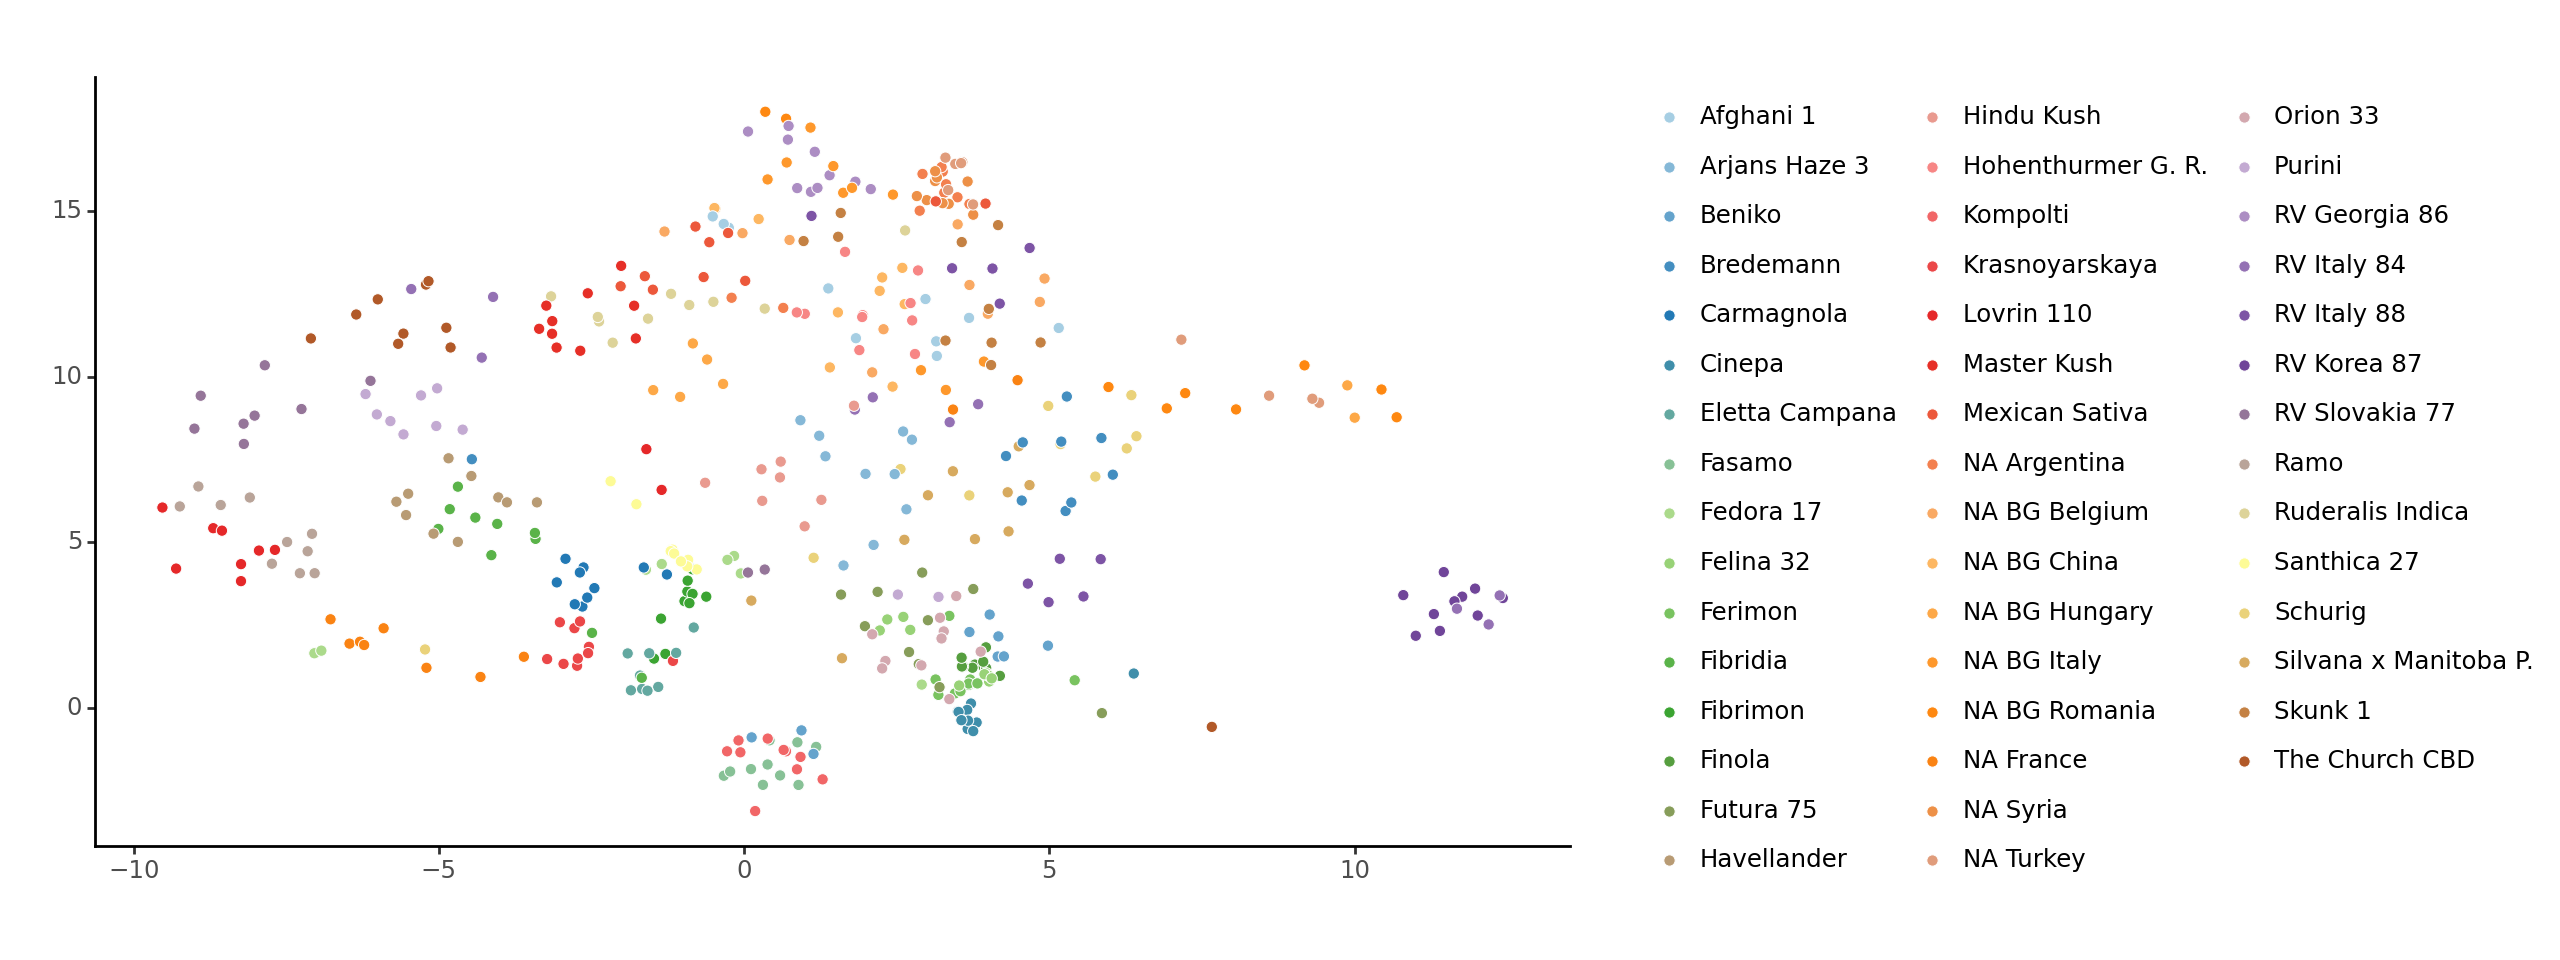

<Figure Size: (1280 x 480)>

In [23]:
from plotnine import *

table = pd.read_csv("data/umap/cultivar-norm.csv").set_index("sample_id")
metadata = pd.read_csv("data/umap/cultivar-metadata.csv")
metadata.rename({"genotype": "Genotype"}, axis=1, inplace=True)

# Plot from mapper
# min_dist 0.8
umap_config = dict(n_neighbors=5, min_dist=.8, n_components=2, metric='braycurtis', densmap=True, n_epochs=500, random_state=5432)
data = table.values
mapper = umap.UMAP(**umap_config).fit(data)
embed = pd.DataFrame(mapper.transform(data))
embed_metadata = pd.concat([metadata, embed], axis=1)

embed_metadata["x"] = embed_metadata[0]
embed_metadata["y"] = embed_metadata[1]
embed_metadata["Genotype"] = pd.Categorical(embed_metadata["Genotype"], ordered=True)
embed_metadata["Genotype"]

# palette = sns.color_palette("Paired", len(embed_metadata['Cultivar'].unique())).as_hex()
palette = ["#A6CEE3", "#85B8D7", "#64A3CC", "#438EC0", "#2279B5", "#3F8EAA", "#63A8A0", "#87C196", "#ABDA8B", "#98D277", "#79C360", "#5AB349", "#3BA432", "#569E3F", "#879D5A", "#B89B74", "#E99A8F", "#F78685", "#F16667", "#EB4748", "#E52829", "#E62F27", "#EC583B", "#F3804F", "#F9A963", "#FDB762", "#FDA847", "#FE982C", "#FE8811", "#FA8313", "#ED9047", "#E09C7B", "#D3A8AF", "#C3AAD2", "#AC8DC3", "#9471B4", "#7D54A5", "#704599", "#957599", "#B9A499", "#DDD399", "#FDFB96", "#EAD27A", "#D7AA5F", "#C48143", "#B15928"]

p = (
    ggplot(embed_metadata, aes(x="x", y="y", fill = "factor(Genotype)"),) +
    geom_point(size=2.1, color="white", stroke = 0.2, show_legend=True) +
    # scale_fill_brewer(type='qual', palette="Paired", expand=(0, 0, 0, 4)) +
    scale_fill_manual(values=palette) +
    theme_classic() + 
    labs(x="", y="", fill="", ) +
    theme(
        figure_size = (2*6.4, 4.8),
        # text=element_text(size=4)
    )
)


p.save("outputs/umap/figures/beta-diveristy.svg")
p.save("outputs/umap/figures/beta-diveristy.png", dpi=600, )
p

## Domestication

In [33]:
embed_metadata["Domestication"]

0      Inbred line
1      Inbred line
2      Inbred line
3      Inbred line
4      Inbred line
          ...     
446      Selection
447      Selection
448      Selection
449      Selection
450      Selection
Name: Domestication, Length: 451, dtype: category
Categories (5, object): ['Cross hybrid' < 'Inbred line' < 'Landrace' < 'NA' < 'Selection']

In [57]:
# metadata = pd.read_csv("data/umap/cultivar-metadata.csv")
# metadata["Chemotype"].fillna(value="NA", inplace=True)

In [68]:
import pandas as pd
import umap
import umap.plot

from plotnine import *

table = pd.read_csv("data/umap/domestication-norm.csv").set_index("sample_id")
metadata = pd.read_csv("data/umap/domestication-metadata.csv")
metadata.rename({"domestication": "Domestication"}, axis=1, inplace=True)
metadata.rename({"chemotype2": "Chemotype"}, axis=1, inplace=True)
metadata["Domestication"].fillna(value="NA", inplace=True)
metadata["Chemotype"].fillna(value="NA", inplace=True)

# Plot from mapper
# min_dist 0.8
umap_config = dict(
    # n_neighbors=450,
    n_neighbors=45,
    min_dist=.5,
    n_components=2,
    metric='braycurtis', 
    densmap=True,
    n_epochs=500,
    init="pca"
    # random_state=5432
)
data = table.values
mapper = umap.UMAP(**umap_config).fit(data)
embed = pd.DataFrame(mapper.transform(data))
embed_metadata = pd.concat([metadata, embed], axis=1)

levels = ["Landrace", "Selection",  "Cross hybrid", "Inbred line", "NA"]

embed_metadata["x"] = embed_metadata[0]
embed_metadata["y"] = embed_metadata[1]
embed_metadata["Domestication"] = pd.Categorical(embed_metadata["Domestication"], categories=levels)
embed_metadata["Chemotype"] = pd.Categorical(embed_metadata["Chemotype"], ordered=True)

/tmp/ipykernel_5667/3774267380.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/tmp/ipykernel_5667/3774267380.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or 

/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: outputs/umap/figures/beta-diveristy-domestication.svg
/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/jmachadofreitas/miniforge3/envs/umap/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: outputs/umap/figures/beta-diveristy-domestication.png


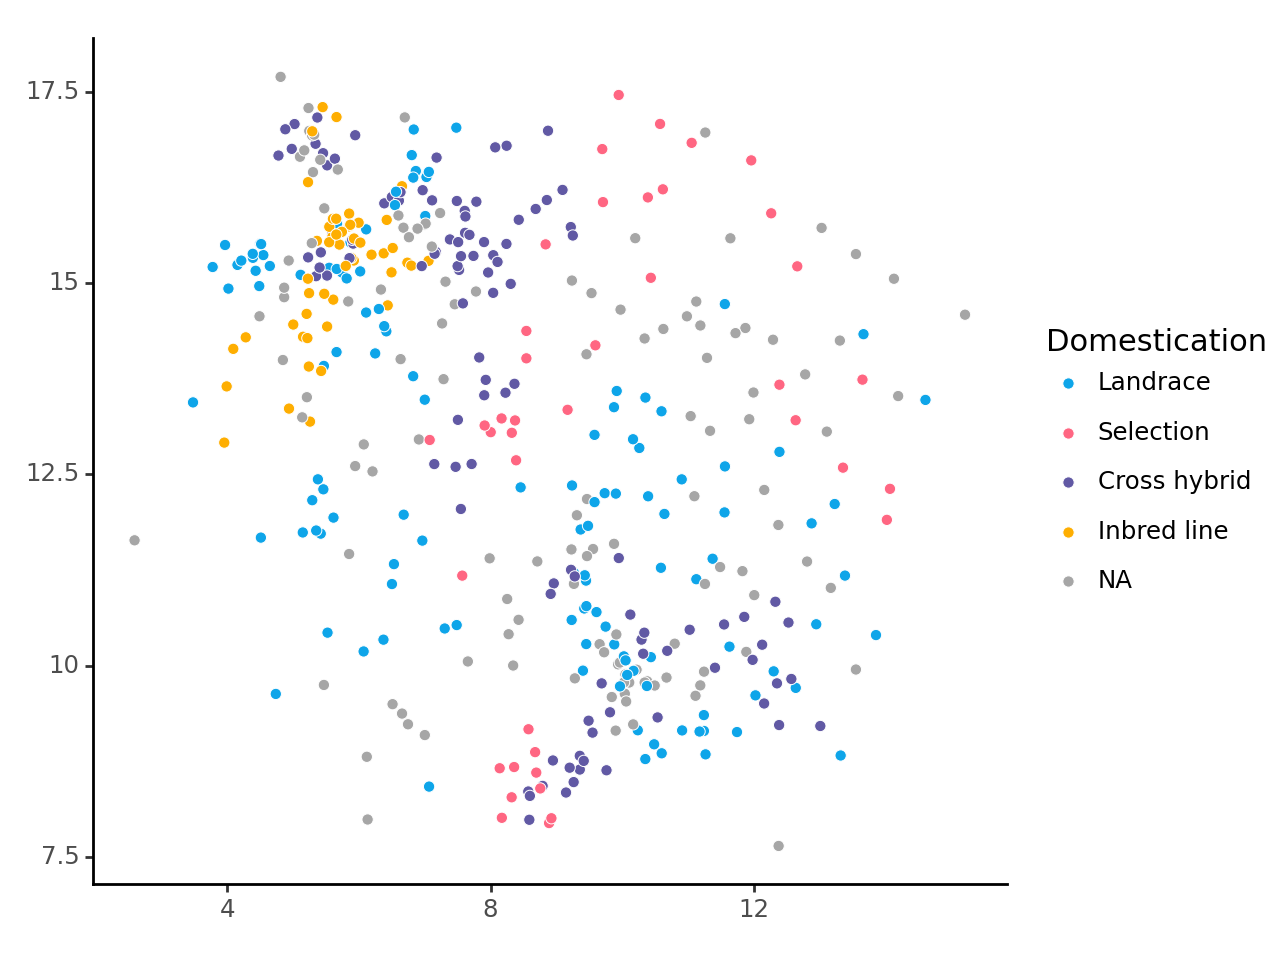

<Figure Size: (640 x 480)>

In [70]:
#0EA5E9: Landrace
#ff6682: selection
#6159a4: cross
#feae01:  inbred
palette = ["#0EA5E9", "#ff6682", "#6159a4","#feae01", "#a6a6a6"]


aesthetic = aes(
    x="x",
    y="y",
    fill = "factor(Domestication)",
    #shape="factor(Chemotype)"
)
p = (ggplot(embed_metadata, aesthetic) +
    geom_point(size=2.1, color="white", stroke = 0.2, show_legend=True) +
    # scale_fill_brewer(type='qual', palette="Paired", expand=(0, 0, 0, 4)) +
    # scale_shape_manual(values=["o", "s", "D"]) +
    scale_fill_manual(values=palette) +
    theme_classic() + 
    labs(
        x="",
        y="", 
        fill="Domestication",
        # shape="Chemotype"
    ) +
    theme(
        figure_size = (6.4, 4.8),
        # text=element_text(size=4)
    )
)


p.save("outputs/umap/figures/beta-diveristy-domestication.svg")
p.save("outputs/umap/figures/beta-diveristy-domestication.png", dpi=600, )
p

In [ ]:
# from sklearn.metrics import silhouette_samples

In [62]:
embed_metadata.to_csv("outputs/umap/embed.csv", index=False)

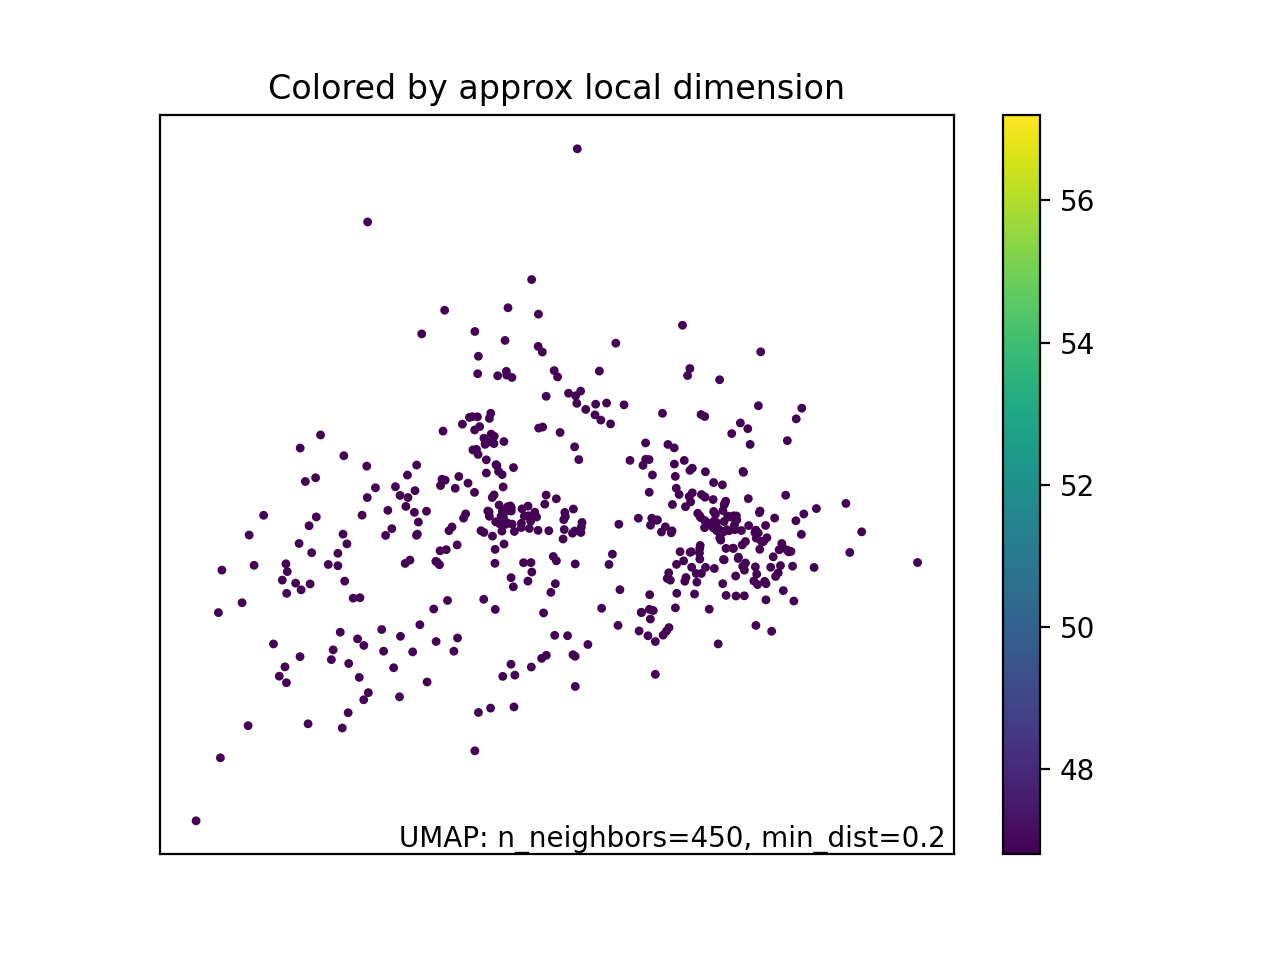

In [36]:
import matplotlib.pyplot as plt 

# n_neighbors=5, min_dist=0.8, n_components=2, metric='braycurtis' minimizes the local_dim
ax = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')
# plt.savefig("outputs/umap/figures/umap_local_dim.png")
plt.show()

In [84]:
from sklearn.preprocessing import LabelEncoder
# umap_config = dict(n_neighbors=5, min_dist=0.8, n_components=2, metric='braycurtis')
data = table.values
hover_data = pd.DataFrame({'index': table.index, 'label': metadata.Cultivar})
labels = LabelEncoder().fit_transform(metadata.Cultivar)
# mapper = umap.UMAP(**umap_config).fit(data, y=labels)
mapper = umap.UMAP(**umap_config).fit(data)
p = umap.plot.interactive(mapper, labels=metadata.Cultivar, hover_data=hover_data)
umap.plot.show(p)

/home/jmachadofreitas/miniconda3/envs/umap/lib/python3.8/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

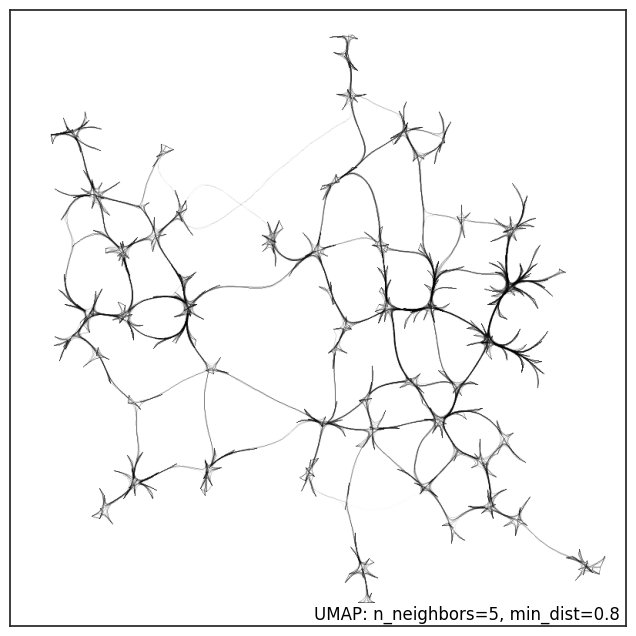

In [9]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

In [ ]:
# intersection_mapper = numeric_mapper * ordinal_mapper
# union_mapper = numeric_mapper + ordinal_mapper
# contrast_mapper = numeric_mapper - ordinal_mapper

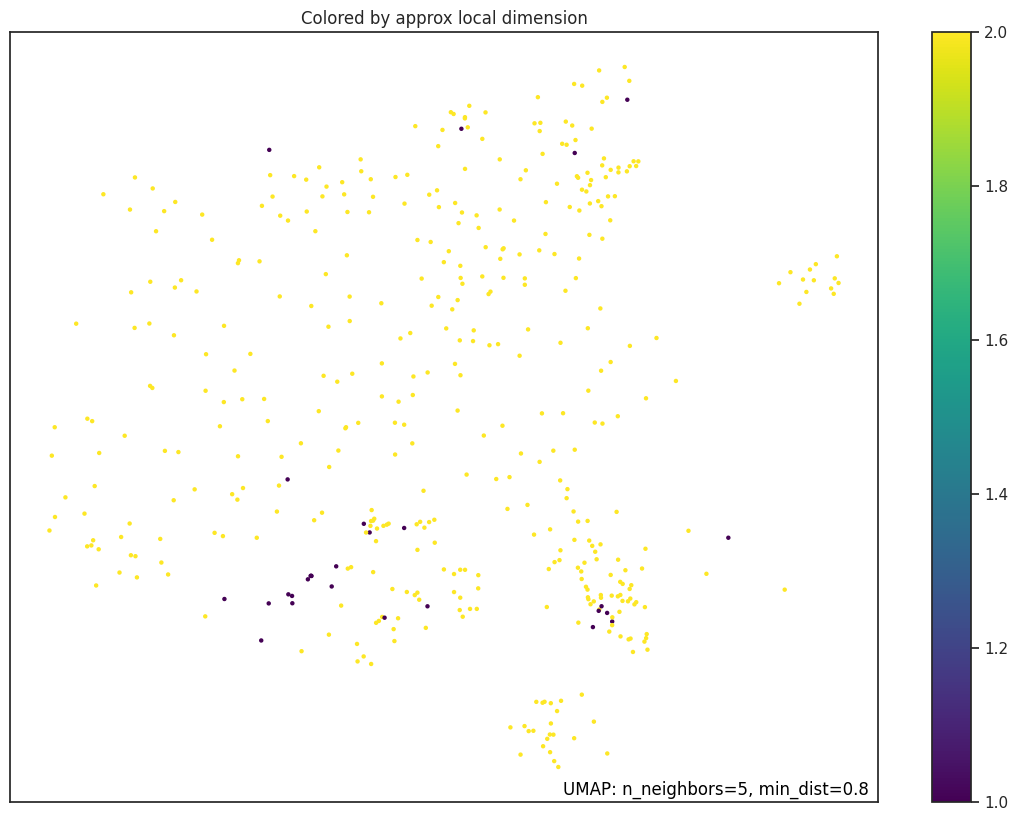

In [85]:
# n_neighbors=5, min_dist=0.8, n_components=2, metric='braycurtis' minimizes the local_dim
ax = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')
plt.savefig("outputs/umap/figures/umap_local_dim.png")

## Sweep Parameters

In [3]:
root = "data/umap"
# filename = "full-cultivar-css.csv"
for filename in filenames:
    for d in min_dists:
        for n in n_neighbors_list:    
            draw_umap(root, filename, n_neighbors=n, min_dist=d, title='n_neighbors = {} min_dist = {}'.format(n, d))

In [23]:
# Plot from file
n_neighbors = 5
embed = pd.read_csv(f"outputs/umap/embed_k={n_neighbors}.csv")
embed_metadata = pd.concat([embed, metadata], axis=1)

In [28]:
embed

,0,1
0,-1.004119,1.963872
1,-1.368254,1.738355
2,3.145908,3.849115
3,-2.715227,3.693680
4,-2.397051,3.839911
...,...,...
445,10.035805,1.265262
446,9.222130,2.016758
447,9.553621,1.826764
448,9.230107,2.120314


In [7]:
# Plot from mapper
umap_config = dict(n_neighbors=5, min_dist=0.8, n_components=2, metric='braycurtis')
data = table.values
mapper = umap.UMAP(**umap_config).fit(data)
embed = pd.DataFrame(mapper.transform(data))
embed_metadata = pd.concat([metadata, embed], axis=1)



In [8]:
ax = sns.scatterplot(embed_metadata, x=0, y=1, hue="Cultivar", legend="brief")
ax.set(xlabel="", ylabel="")
plt.setp(ax.get_legend().get_texts(), fontsize=2)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.legend(fontsize=12)
plt.rc('legend', fontsize=8)
plt.show()
sns.scatterplot(table, x=0, y=1, hue="cultivar")

ValueError: Could not interpret value `Cultivar` for `hue`. An entry with this name does not appear in `data`.

## Interactive Plots

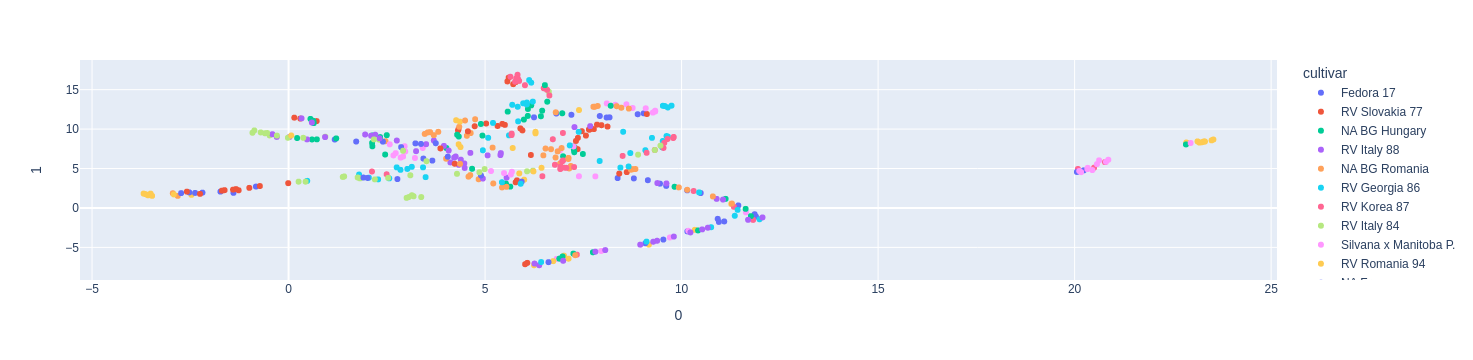

In [6]:
import plotly.express as px

# n_neighbors = 10
# embed = pd.read_csv(f"outputs/umap/asv_n={n_neighbors}.csv")
# embed_metadata = pd.concat([embed, metadata], axis=1)

   
data = table.values
projector = umap.UMAP(
    n_neighbors=8,
    min_dist=0.5,
    n_components=2,
    metric="braycurtis"
)

u = projector.fit_transform(data)
embed = pd.DataFrame(u)
embed_metadata = pd.concat([embed, metadata], axis=1)


hover_data = ["cultivar", "replicates"]
fig = px.scatter(embed_metadata, x=0, y=1, color="cultivar", hover_data=hover_data)
fig.show()

d = (0.0, 0.01, 0.1, 0.5, 1)
n = (5, 10, 20, 50, 100)


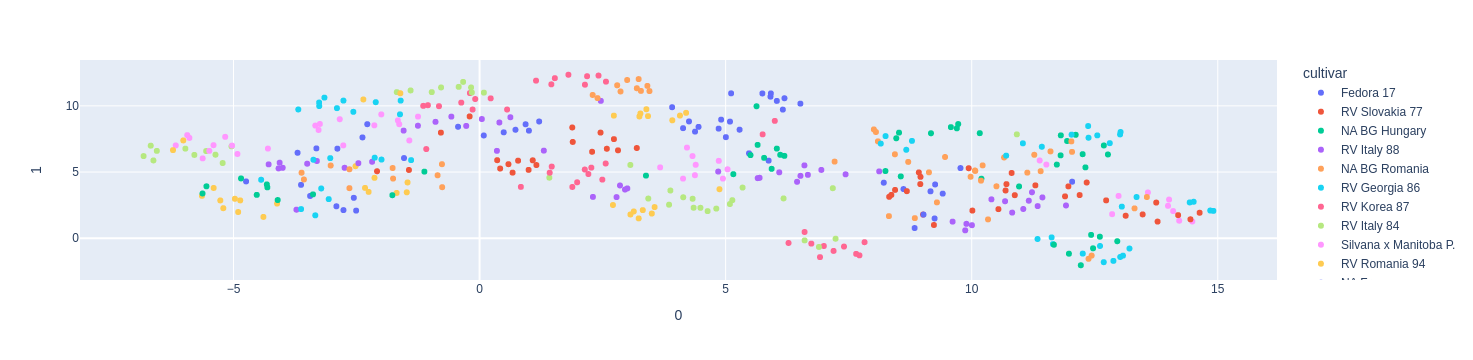

In [20]:
import plotly.express as px

print("d =", min_dists)
print("n =", n_neighbors_list)
embed = pd.read_csv(f"outputs/umap/sample-full-cultivar-css_n=10_d=1.csv")
embed_metadata = pd.concat([embed, metadata], axis=1)


hover_data = ["cultivar", "replicates"]
fig = px.scatter(embed_metadata, x="0", y="1", color="cultivar", hover_data=hover_data)
fig.show()

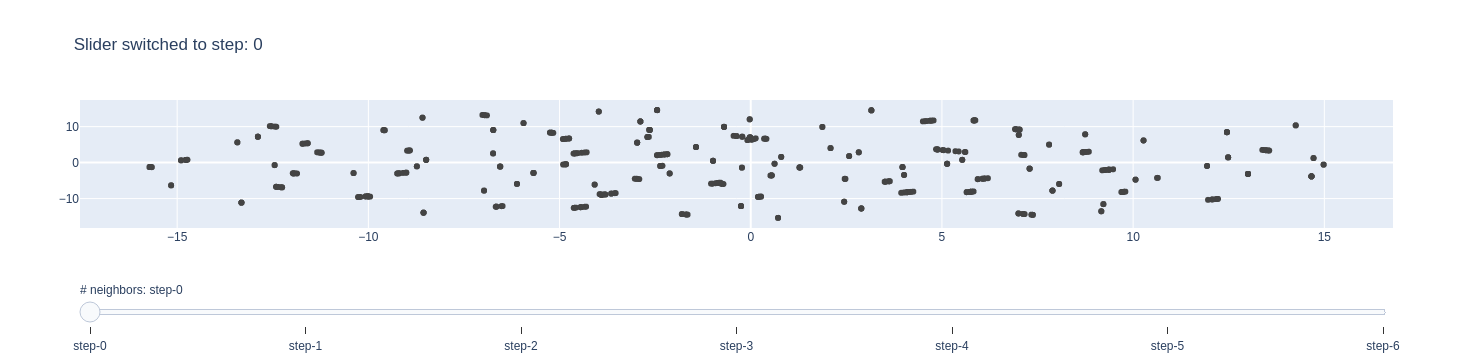

In [20]:
import matplotlib as mpl 
import pandas as pd
import plotly.graph_objects as go
import numpy as np


# Sample nominal vector (pd.Series)
nominal_vector = metadata["cultivar"]
unique_values = nominal_vector.unique()
colormap_fn = mpl.colormaps.get_cmap('viridis')
colormap = dict(zip(unique_values, [colormap_fn(i) for i in np.linspace(0, 1, len(unique_values))]))
colors = nominal_vector.map(colormap)


# Create figure
fig = go.Figure()


# Add traces, one for each slider step
for step in (2, 5, 10, 20, 50, 100, 200):
    embed = pd.read_csv(f"outputs/umap/embed_k={step}.csv")
    table = pd.concat([embed, metadata], axis=1)
    fig.add_trace(
        go.Scatter(
            visible=False,
            # name="𝜈 = " + str(step),
            x=embed_metadata["0"],
            y=embed_metadata["1"],
            marker=dict(color=colors, colorscale='Viridis'),
            mode = "markers",
        )
    )

# Make 7th trace visible
fig.data[6].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "# neighbors: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

# Embed ASVs

In [19]:
table_t = pd.read_csv("data/umap/t_cultivar-norm.csv").set_index("ASV")
# ecotype = pd.read_csv("data/umap/t_cultivar-ecotype.csv")

In [21]:
umap_config = dict(n_neighbors=5, min_dist=0.8, n_components=2, metric='braycurtis')
data = table_t.values
mapper = umap.UMAP(**umap_config).fit(data)
embed = pd.DataFrame(mapper.transform(data))

/home/jmachadofreitas/miniconda3/envs/umap/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!


In [24]:
embed

,0,1,x,y
0,7.489674,10.023922,7.489674,10.023922
1,-2.372844,9.743592,-2.372844,9.743592
2,3.355789,13.406846,3.355789,13.406846
3,-5.768768,3.741692,-5.768768,3.741692
4,10.320753,5.025274,10.320753,5.025274
...,...,...,...,...
5295,6.719395,4.098104,6.719395,4.098104
5296,-10.998020,-16.823647,-10.998020,-16.823647
5297,-13.099796,3.130097,-13.099796,3.130097
5298,6.982516,-22.941866,6.982516,-22.941866


/home/jmachadofreitas/miniconda3/envs/umap/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/jmachadofreitas/miniconda3/envs/umap/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: outputs/umap/figures/asv-association.svg
/home/jmachadofreitas/miniconda3/envs/umap/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/jmachadofreitas/miniconda3/envs/umap/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: outputs/umap/figures/asv-association.png


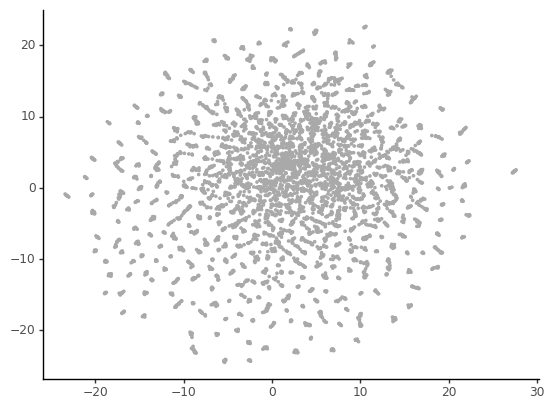

<ggplot: (8777096937328)>

In [27]:
from plotnine import *

embed["x"] = embed[0]
embed["y"] = embed[1]

#embed_ecotype = pd.concat([embed, ecotype], axis=1)
#embed_ecotype["x"] = embed_ecotype[0]
#embed_ecotype["y"] = embed_ecotype[1]
#embed_ecotype["Ecotype"] = embed_ecotype["sign"]
#embed_ecotype["is_sign"] = 1
#embed_ecotype.loc[embed_ecotype["sign"] != "NON SIGNIFICANT", "is_sign"] = 2
#embed_ecotype.sort_values("is_sign", inplace=True)
#embed_ecotype = embed_ecotype.assign(Ecotype = pd.Categorical(embed_ecotype["Ecotype"], ["SPECIALIST", "GENERALIST", "NON SIGNIFICANT"]))

p = (
    # ggplot(embed_ecotype, aes(x="x", y="y", fill = "Ecotype", size = "is_sign", alpha = "is_sign")) +
    ggplot(embed, aes(x="x", y="y")) +
    guides(alpha = None, size = None) +
    scale_alpha_continuous(range=[0.4,1]) +
    # scale_size_continuous(range=[1,1.6]) +
    geom_point(color="darkgray", stroke = 0, show_legend=True) +
    # scale_fill_manual(values=("deepskyblue", "orange", "dimgrey")) +
    labs(x="", y="", fill="", size="") +
    theme_classic()
)

p.save("outputs/umap/figures/asv-association.svg")
p.save("outputs/umap/figures/asv-association.png", dpi=600)
p

<Axes: >

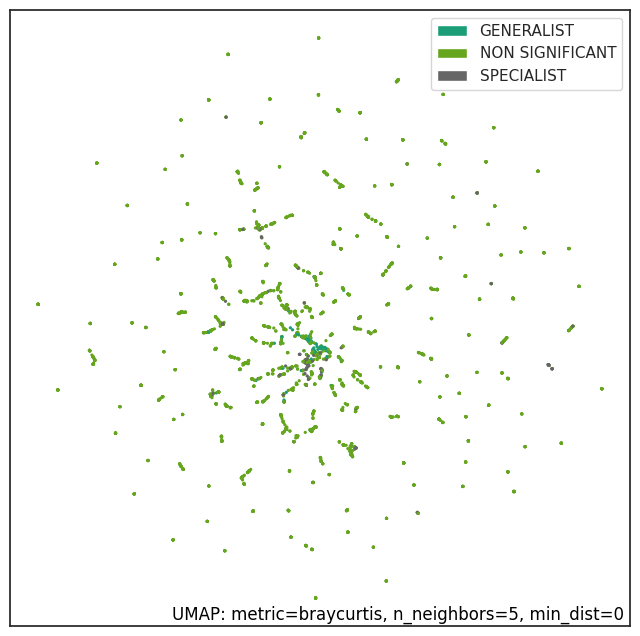

In [110]:
umap_config = dict(n_neighbors=5, min_dist=0, n_components=2, metric='braycurtis')
umap.plot.points(mapper, labels=ecotype.sign, color_key_cmap='Dark2', background='white')

In [37]:
# hover_data = pd.DataFrame({'index': table_t.index, 'label': ecotype.sign})
# p = umap.plot.interactive(mapper, labels=ecotype.sign, hover_data=hover_data, point_size=5)
# umap.plot.show(p)

In [10]:
import plotly.express as px

# n_neighbors = 10
# embed = pd.read_csv(f"outputs/umap/asv_n={n_neighbors}.csv")
# embed_metadata = pd.concat([embed, metadata], axis=1)

   
data = table.values
projector = umap.UMAP(
    n_neighbors=10,
    min_dist=0,
    n_components=2,
    metric="braycurtis"
)

u = projector.fit_transform(data)
embed = pd.DataFrame(u)
embed_metadata = pd.concat([embed, metadata], axis=1)


hover_data = ["cultivar", "replicates"]
fig = px.scatter(embed_metadata, x="0", y="1", color="cultivar", hover_data=hover_data)
fig.show()

NameError: name 'table' is not defined

In [6]:
filenames = list()
stem = "cultivar"
for prefix  in ["full-", ""]:
    for suffix  in ["-css", ""]:
        filenames.append(f"{prefix}{stem}{suffix}-t.csv")

root = "data/umap"
# filename = "full-cultivar-css.csv"
for filename in filenames:
    for d in min_dists:
        for n in n_neighbors_list:    
            draw_umap(root, filename, n_neighbors=n, min_dist=d, title='n_neighbors = {} min_dist = {}'.format(n, d), prefix="asv")

In [ ]:
# projector = umap.UMAP()
# embedding = projector.fit_transform(scaled_data)
# pd.DataFrame(embedding).to_csv("../output/embed.csv")
# umap.plot.points(mapper, labels=fmnist.target, width=500, height=500)
# sns.scatterplot(x=embedding[:,0], y=embedding[:,1])

In [ ]:
import plotly.express as px


# Fix tax-vsearch-v2.tsv
otu2taxa = pd.read_csv("../data/phyloseq/tax-vsearch-v2.tsv", sep="t")
otu2taxa[otu2taxa.columns[1].split(" ")] = otu2taxa.iloc[:,1].str.split(" ", expand=True)
otu2taxa.drop(otu2taxa.columns[1], axis=1, inplace=True)
otu2taxa.to_csv("../data/phyloseq/tax-vsearch-v3.csv", index=False)

cols = ["Domain", "Phylum", "Class", "Order", "Family", "Genus", "Species"]
embed = pd.read_csv("outputs/embed_k=5.csv")
otu2taxa = pd.read_csv("data/phyloseq/tax-vsearch-v3.csv")
data = embed.set_index("ASV").join(otu2taxa.set_index("OTUID"))

fig = px.scatter(data, x="0", y="1", hover_data=cols)
fig.show()